In [1]:
using CovidSim

┌ Info: Precompiling CovidSim [top-level]
└ @ Base loading.jl:1260


In [2]:
seattle = (fips=53033, id=2); nyc=(fips=36061, id=3); bismarck=(fips=38015,id=10)

(fips = 38015, id = 10)

In [3]:
geo = CovidSim.readgeodata("../data/geo2data.csv")
geo[:,1:7]

15×7 Array{Any,2}:
  6075  "San Francisco"  "San Francisco"  "CA"  2   881549  17255
 53033  "Seattle"        "Seattle"        "WA"  2  2252782   5175
 36061  "New York"       "New York"       "NY"  1  5803210  40306
 39035  "Cuyahoga"       "Cleveland"      "OH"  2  1235072   3063
 48113  "Dallas"         "Dallas"         "TX"  2  2635516   4000
 39151  "Stark"          "Canton"         "OH"  3   370606   1688
 34013  "Essex"          "Newark"         "NJ"  3   798975   6396
 13089  "DeKalb"         "Atlanta"        "GA"  2  1063937   2708
 17167  "Sangamon"       "Springfield"    "IL"  3   194672   1747
 38015  "Burleigh"       "Bismarck"       "ND"  3    95626   2157
  4013  "Maricopa"       "Phoenix"        "AZ"  1  4485414   2798
 42003  "Allegheny"      "Pittsburgh"     "PA"  2  1216045   5461
 27053  "Hennepin"       "Minneapolis"    "MN"  2  1265843   7821
 31055  "Douglas"        "Omaha"          "NE"  2   571327   3378
  8031  "Denver"         "Denver"         "CO"  2   72721

In [4]:
seed_1_6 = seed_case_gen(1, [0,3,3,0,0], 1, nil, agegrps)

(::CovidSim.var"#scase#110"{CovidSim.var"#scase#109#111"{Int64,Array{Int64,1},Int64,Int64,UnitRange{Int64}}}) (generic function with 1 method)

In [6]:
alldict, env, series = run_a_sim(180,seattle.fips, showr0=false, silent=true,
       dtfilename="../parameters/dec_tree_all_25.csv",
       spreadcases=[],
       runcases=[seed_1_6]);

*** seed day 1 locale 53033....
Simulation completed for 180 days.


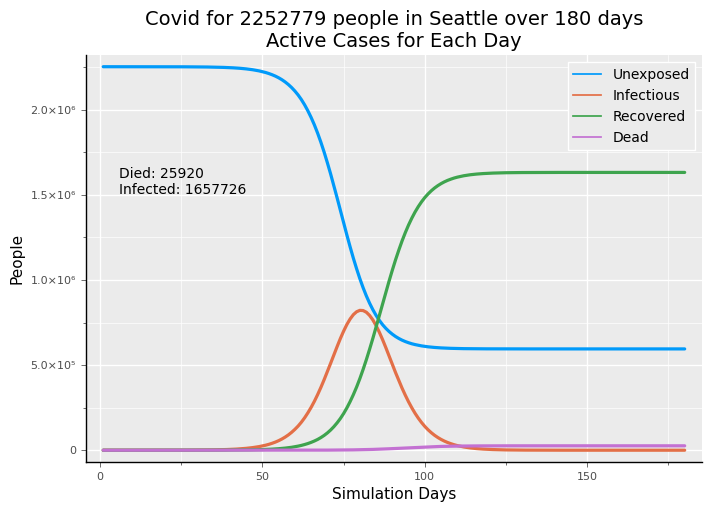

In [7]:
cumplot(series,seattle.fips,geo=geo)

### Strong Social Distancing

Reset the model to defaults.

In [9]:
alldict, env, series = run_a_sim(180,seattle.fips, showr0=false, silent=true,
       dtfilename="../parameters/dec_tree_all_25.csv",
       spreadcases=[],
       runcases=[seed_1_6]);

*** seed day 1 locale 53033....
Simulation completed for 180 days.


In [10]:
str_50 = sd_gen(start=50, comply=.8, cf=(.2,1.3), tf=(.18,.45))

(::CovidSim.var"#sd_mod#123"{CovidSim.var"#sd_mod#122#124"{Int64,Float64,Tuple{Float64,Float64},Tuple{Float64,Float64}}}) (generic function with 1 method)

In [11]:
alldict, env, series = run_a_sim(180,seattle.fips, showr0=false, silent=true,
       dtfilename="../parameters/dec_tree_all_25.csv",
       spreadcases=[str_50],
       runcases=[seed_1_6]);

*** seed day 1 locale 53033....
Simulation completed for 180 days.


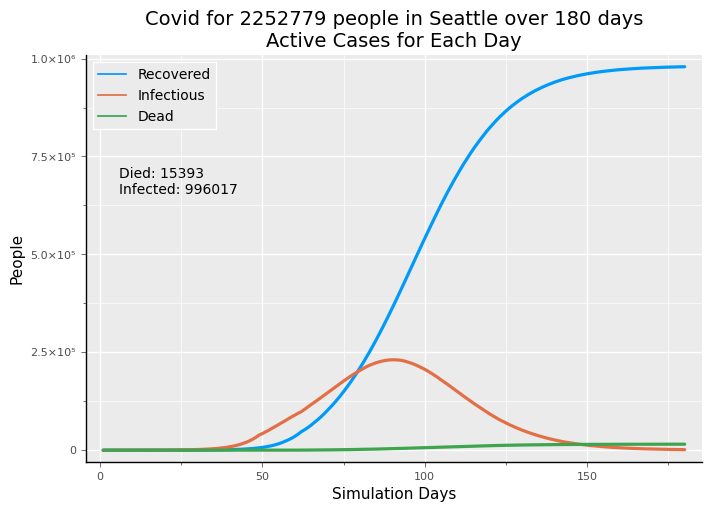

In [12]:
cumplot(series,seattle.fips,[recovered, infectious, dead],geo=geo)

### Open Totally (which won't happen...)
This uses opening back to essentially no social distancing and an R0 between 1.9 and 2.0. People will voluntarily be more prudent and government recommendations and policies will provide for more limited opening. So, this shows why complete opening is't possible:  the full force of the virus does return with only a slight delay.

In [13]:
# Reset to defaults
alldict, env, series = run_a_sim(180,seattle.fips, showr0=false, silent=true,
       dtfilename="../parameters/dec_tree_all_25.csv",
       spreadcases=[],
       runcases=[seed_1_6]);

*** seed day 1 locale 53033....
Simulation completed for 180 days.


In [14]:
open = sd_gen(start=105, comply=0.0, cf=(.3,1.8), tf=(.18,.62))

(::CovidSim.var"#sd_mod#123"{CovidSim.var"#sd_mod#122#124"{Int64,Float64,Tuple{Float64,Float64},Tuple{Float64,Float64}}}) (generic function with 1 method)

In [15]:
alldict, env, series = run_a_sim(180,seattle.fips, showr0=false, silent=true,
       dtfilename="../parameters/dec_tree_all_25.csv",
       spreadcases=[str_50, open],
       runcases=[seed_1_6]);

*** seed day 1 locale 53033....
Simulation completed for 180 days.


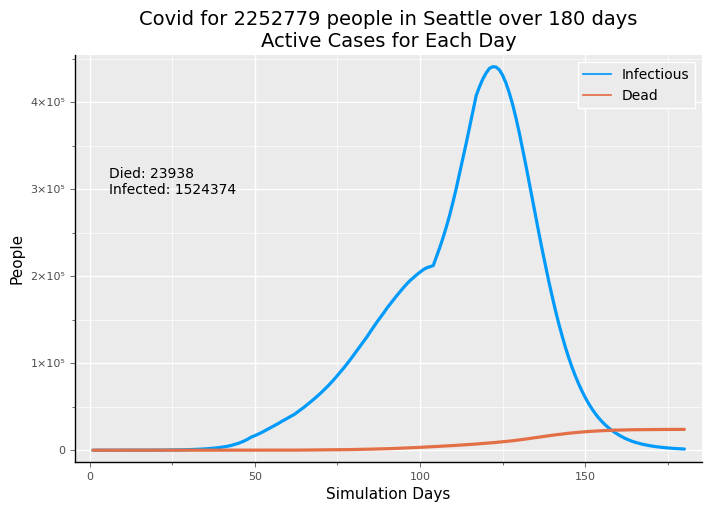

In [16]:
cumplot(series,seattle.fips,[infectious, dead],geo=geo)

In [ ]:
r0_sim(;sa_pct=[1.0,0.0,0.0], density_factor=1.0, dt=[], cf=[], tf=[],
                compliance=[1.0], shift_contact=(.2,1.8), shift_touch=(.18,.62), pri=false, env=env)

The preceding estimates R0 based on equal representation in all demographic groups of the simulation.  But, the groups are not equally respresented so this is a slight underestimate of the socially determined R0.

### Limited Opening

In [19]:
# reset the model to defaults
alldict, env, series = run_a_sim(180,seattle.fips, showr0=false, silent=true,
       dtfilename="../parameters/dec_tree_all_25.csv",
       spreadcases=[],
       runcases=[seed_1_6]);

*** seed day 1 locale 53033....
Simulation completed for 180 days.


In [20]:
mod_105 = sd_gen(start=105,cf=(.2,1.45), tf=(.18,.5),comply=.7)

(::CovidSim.var"#sd_mod#123"{CovidSim.var"#sd_mod#122#124"{Int64,Float64,Tuple{Float64,Float64},Tuple{Float64,Float64}}}) (generic function with 1 method)

In [72]:
r0_sim(;sa_pct=[1.0,0.0,0.0], density_factor=1.0, dt=[], cf=[], tf=[],
                compliance=[.75], shift_contact=(.2,1.45), shift_touch=(.18,.5), pri=false)

(r0 = 1.1708333333333334, spreaders = 480, contacts = 361, touched = 160, infected = 562)

In [21]:
alldict, env, series = run_a_sim(180,seattle.fips, showr0=false, silent=true,
       dtfilename="../parameters/dec_tree_all_25.csv",
       spreadcases=[str_50, mod_105],
       runcases=[seed_1_6]);

*** seed day 1 locale 53033....
Simulation completed for 180 days.


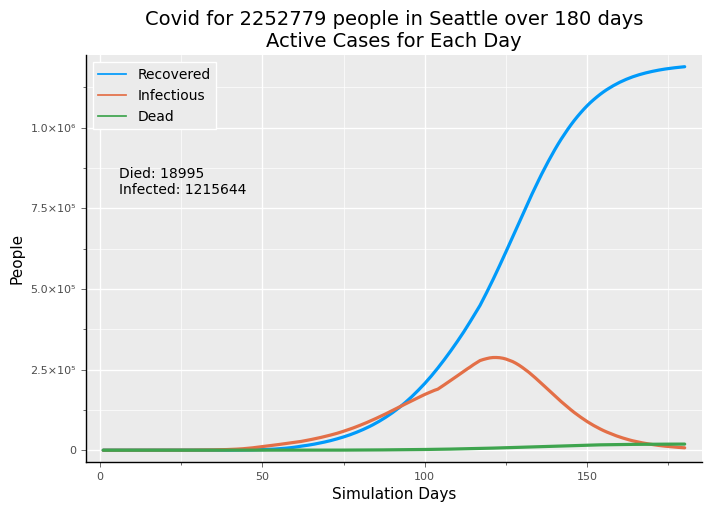

In [22]:
cumplot(series,seattle.fips,[recovered,infectious, dead],geo=geo)

Even with meaningful easing or restrictions, this moderate opening is very effective because it comes on the base of a lower curve that resulted from earlier strict social distancing.

This alternative would *not* be recommended. Widespread testing of asymptomatic people with contact tracing is very hard to achieve, but is a preferred alternative.  (Modeling effort is more significant: it is coming.)

### An Alternative: Fewer Restrictions with Isolation of the Vulnerable
Note that this cases models vulnerable people as the age groups from 60 to 80 and over 80. Other people are vulnerable: people with diabetes, hypertension, immuno-compromise, cancer patients, smokers, and others across age groups. It's beyond this model to attempt to represent these vulnerabilities across age groups at this poing.

In [23]:
mod_less_105 = sd_gen(start=105,cf=(.2,1.55), tf=(.18,.52),comply=.55)

(::CovidSim.var"#sd_mod#123"{CovidSim.var"#sd_mod#122#124"{Int64,Float64,Tuple{Float64,Float64},Tuple{Float64,Float64}}}) (generic function with 1 method)

In [76]:
r0_sim(;sa_pct=[1.0,0.0,0.0], density_factor=1.0, dt=[], cf=[], tf=[],
                compliance=[.65], shift_contact=(.2,1.55), shift_touch=(.18,.55), pri=false)

(r0 = 1.46875, spreaders = 480, contacts = 369, touched = 176, infected = 705)

In [28]:
function isolate_vulnerable(locale; opendat=openmx, isodat=isolatedmx,testdat=openmx, env=env)
    if ctr[:day] == 105
        isolate!(.70,[unexposed, nil,mild,sick, severe],[5],1:laglim, locale; opendat=opendat, isodat=isodat)
        isolate!(.50,[unexposed,nil,mild,sick, severe],[4],1:laglim, locale; opendat=opendat, isodat=isodat)
    end
end

isolate_vulnerable (generic function with 1 method)

In [29]:
# reset the model to defaults
alldict, env, series = run_a_sim(180,seattle.fips, showr0=false, silent=true,
       dtfilename="../parameters/dec_tree_all_25.csv",
       spreadcases=[],
       runcases=[]);
laglim=25

Simulation completed for 180 days.


25

In [30]:
alldict, env, series = run_a_sim(180,seattle.fips, showr0=false, silent=true,
       dtfilename="../parameters/dec_tree_all_25.csv",
       spreadcases=[str_50, mod_less_105],
       runcases=[seed_1_6, isolate_vulnerable]);

*** seed day 1 locale 53033....
Simulation completed for 180 days.


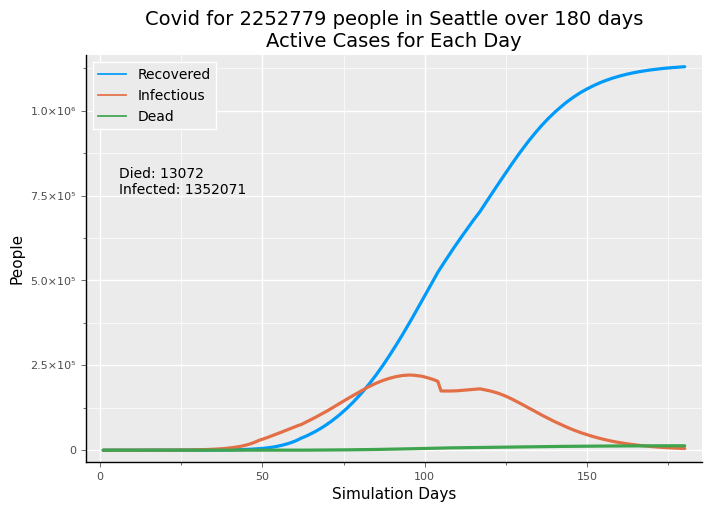

In [32]:
cumplot(series,seattle.fips,[recovered,infectious, dead],geo=geo)

**Assessment:**
This was put together quickly and requires more careful review. The restrictions are considerably looser than the limited opening above, which is clear from the high infection rate. But, the number of deaths is lower. Since over 75% of deaths occur in agegroups over 60 combined with over 80, the moderation of deaths will primarily benefit those age groups. This warrants more work.